In [28]:
import numpy as np
import captum
from captum.attr import visualization as viz
import json

from utils import load_model_pth, ImageLoader, GuidedGradCamAlgorithm, CaptumVisualizer, DataTransform

クラスインデックス

In [29]:
class_index = json.load(open('../config/class_index.json', 'r'))
print(class_index)
num_classes = len(class_index)

{'0': 'NORMAL', '1': 'PNEUMONIA'}


2

モデルの読み込み

In [30]:
model = load_model_pth('convnext_base', num_classes=num_classes, model_dir='../models/convnext_base.pth')
model.eval()

ConvNeXt(
  (stem): Sequential(
    (0): Conv2d(3, 128, kernel_size=(4, 4), stride=(4, 4))
    (1): LayerNorm2d((128,), eps=1e-06, elementwise_affine=True)
  )
  (stages): Sequential(
    (0): ConvNeXtStage(
      (downsample): Identity()
      (blocks): Sequential(
        (0): ConvNeXtBlock(
          (conv_dw): Conv2d(128, 128, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=128)
          (norm): LayerNorm((128,), eps=1e-06, elementwise_affine=True)
          (mlp): Mlp(
            (fc1): Linear(in_features=128, out_features=512, bias=True)
            (act): GELU(approximate=none)
            (drop1): Dropout(p=0.0, inplace=False)
            (fc2): Linear(in_features=512, out_features=128, bias=True)
            (drop2): Dropout(p=0.0, inplace=False)
          )
          (drop_path): Identity()
        )
        (1): ConvNeXtBlock(
          (conv_dw): Conv2d(128, 128, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=128)
          (norm): LayerNorm((128,), e

GuidedGradCAMで可視化

In [31]:
imageloader = ImageLoader('../input/PNEUMONIA/person1946_bacteria_4874.jpeg', transform=DataTransform(image_size=224))
captumviz = CaptumVisualizer(imageloader)

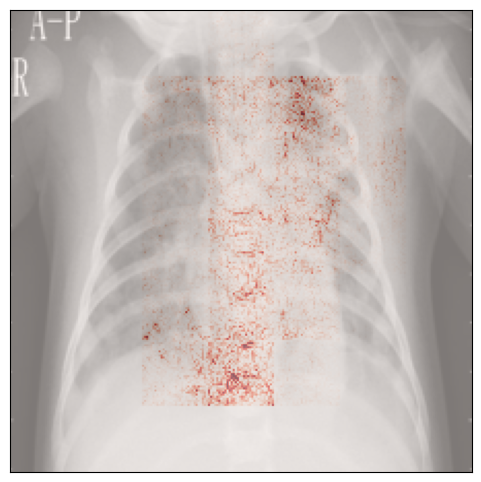

In [32]:
_ = captumviz.visualization_img_attr(
    GuidedGradCamAlgorithm(model, model.stages[3].blocks[2].drop_path),
    target=0,
    method='blended_heat_map',
    cmap='Reds'
)

In [33]:
figure, _ = captumviz.visualization_img_attr(
    GuidedGradCamAlgorithm(model, model.stages[3].blocks[2].drop_path),
    target=0,
    method='blended_heat_map',
    cmap='Reds'
)
figure.savefig('../output/image/ggc.png')

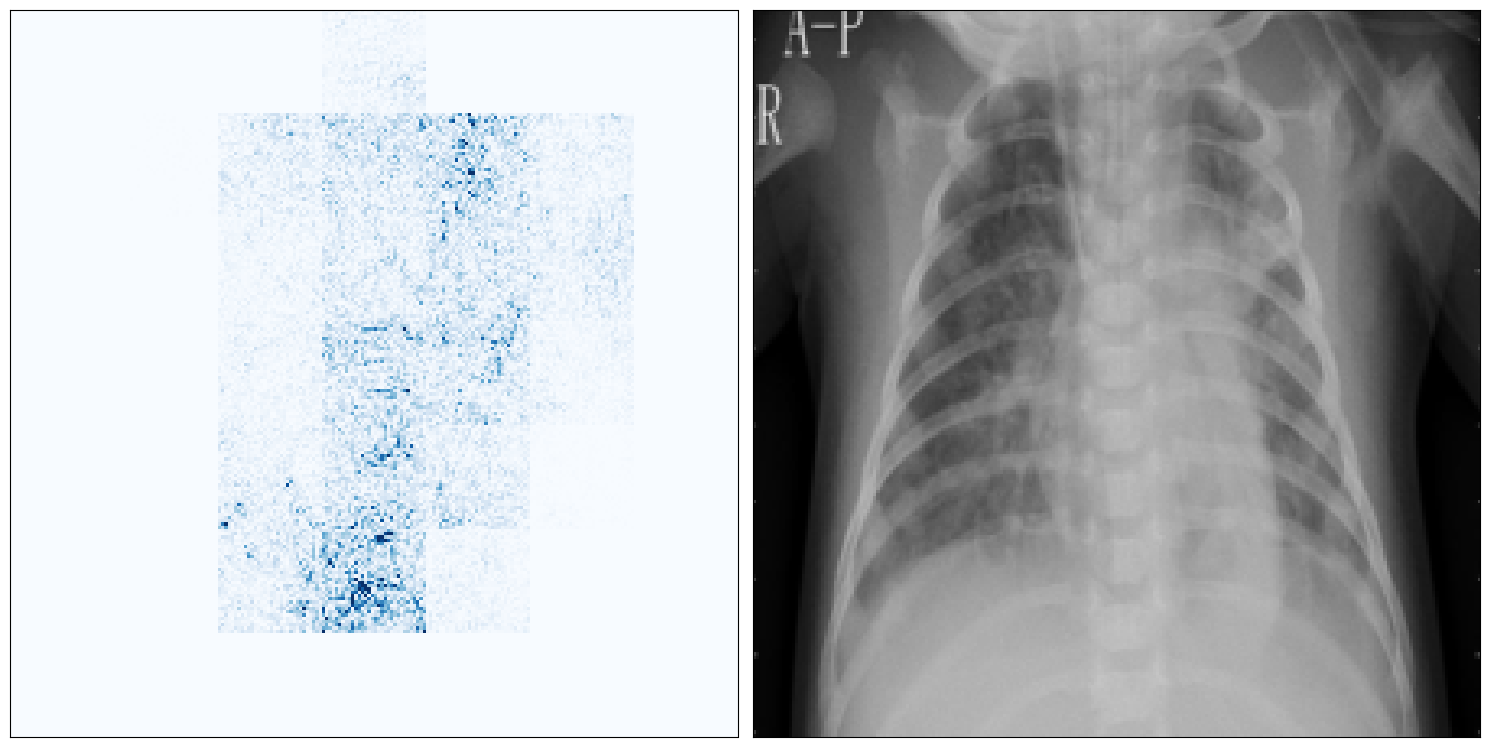

In [ ]:
_ = captumviz.visualization_image_attr_multiple(
    GuidedGradCamAlgorithm(model, model.stages[3].blocks[2].drop_path),
    target=0,
    methods=["heat_map", "original_image"],
    signs = ["absolute_value", "all"],
    fig_size=(15, 15)
    )

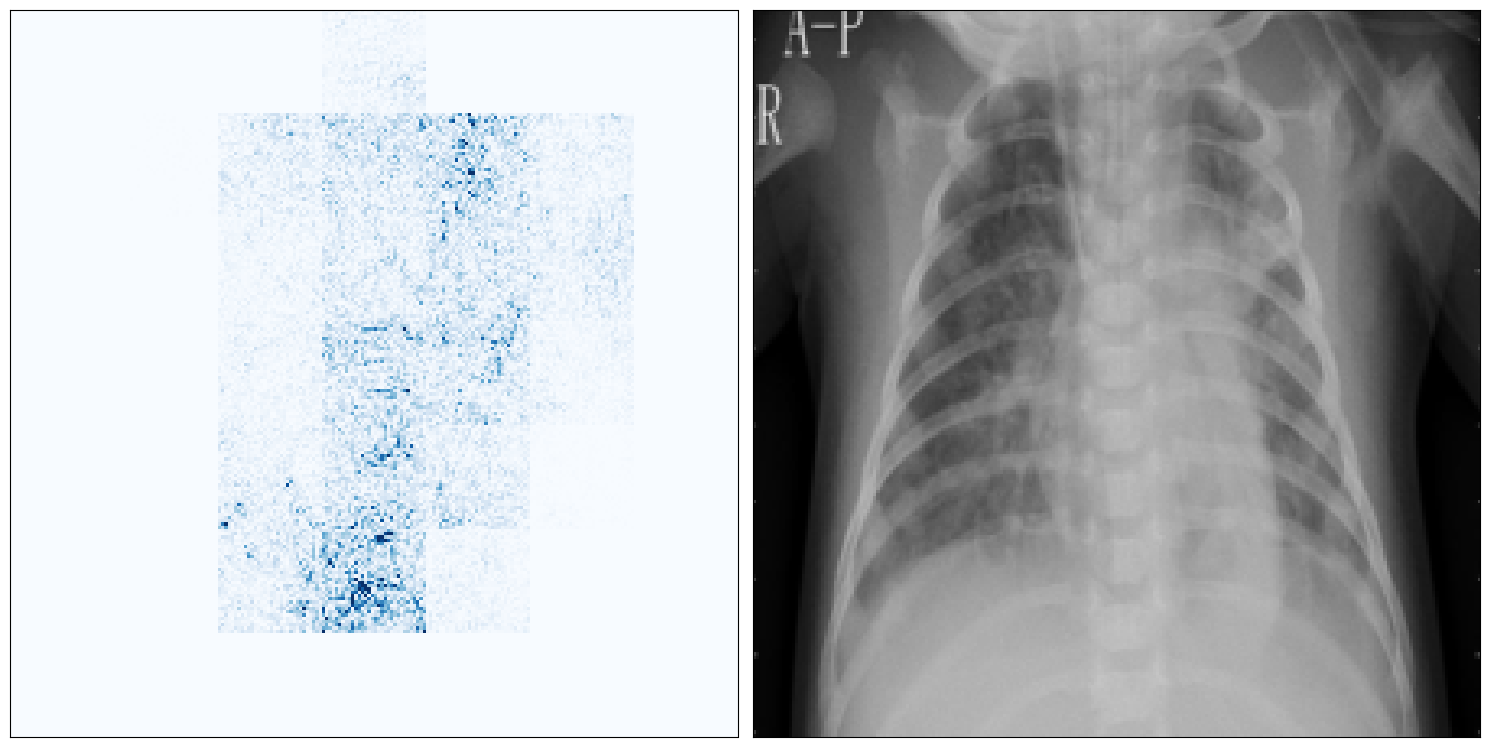

In [ ]:
figure, _ = captumviz.visualization_image_attr_multiple(
    GuidedGradCamAlgorithm(model, model.stages[3].blocks[2].drop_path),
    target=0,
    methods=["heat_map", "original_image"],
    signs = ["absolute_value", "all"],
    fig_size=(15, 15)
    )
figure.savefig('../output/image/ggc_multi.png')